In [1]:
#Importing Modules
import pandas as pd
import numpy as np
from scipy.stats import chi2
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use("ggplot")
#from google.colab import drive
from pandas.testing import assert_frame_equal
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('base_tratada.csv')
df['target'] = np.where(df['ano_obito']==2019, 0, 1)
periodo='2019-2020'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58020 entries, 0 to 58019
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TIPOBITO       58020 non-null  int64  
 1   ocor_MUNNOMEX  58020 non-null  object 
 2   ocor_CAPITAL   58020 non-null  object 
 3   ocor_SIGLA_UF  58020 non-null  object 
 4   ocor_REGIAO    58020 non-null  object 
 5   IDADEMAE       58020 non-null  float64
 6   def_escol_mae  58020 non-null  object 
 7   def_raca_cor   58020 non-null  object 
 8   def_sexo       58020 non-null  object 
 9   PESO           58020 non-null  float64
 10  def_parto      58020 non-null  object 
 11  def_gravidez   58020 non-null  object 
 12  def_gestacao   58020 non-null  object 
 13  data_obito     58020 non-null  object 
 14  ano_obito      58020 non-null  int64  
 15  target         58020 non-null  int32  
dtypes: float64(2), int32(1), int64(2), object(11)
memory usage: 6.9+ MB


In [4]:
# Categorizando Idade
condicoes = [
    (df['IDADEMAE'] <= 15),
    (df['IDADEMAE'] > 15) & (df['IDADEMAE'] <= 25),
    (df['IDADEMAE'] > 25) & (df['IDADEMAE'] <= 35),
    (df['IDADEMAE'] > 35)
]
valores = ['idade_mae_menor_que_15', 'idade_mae_entre_15_e_25', 'idade_mae_entre_25_e_35', 'idade_mae_maior_que_35']
# Aplicando as condições e os valores ao DataFrame
df['desc_idade_mae'] = np.select(condicoes, valores)

In [5]:
# Categorizando Peso
condicoes = [
    (df['PESO'] <= 1000),
    (df['PESO'] > 1000) & (df['PESO'] <= 2000),
    (df['PESO'] > 2000) & (df['PESO'] <= 3000),
    (df['PESO'] > 3000)
]
valores = ['peso_menor_que_1000', 'peso_entre_1000_e_2000', 'peso_entre_2000_e_3000', 'peso_maior_que_3000']
# Aplicando as condições e os valores ao DataFrame
df['desc_peso'] = np.select(condicoes, valores)

In [6]:
# Variável PRM
df['PRM'] = np.where(df['def_gestacao'].isin(['Ignorado', '37 a 41 semanas', '42 semanas e mais']), 0, 1)

In [7]:
df = df[
 [   'target'
    ,'ocor_REGIAO'
    , 'ocor_CAPITAL'
    , 'desc_idade_mae'
    , 'def_escol_mae'
    , 'def_sexo'
    #, 'desc_peso'
    , 'def_parto'
    , 'def_gravidez'
    , 'PESO'
    #, 'def_gestacao'
    , 'PRM'
  
    ]
]

In [8]:
df = pd.get_dummies(df)

In [9]:
df

,target,PESO,PRM,ocor_REGIAO_Centro-Oeste,ocor_REGIAO_Nordeste,ocor_REGIAO_Norte,ocor_REGIAO_Sudeste,ocor_REGIAO_Sul,ocor_CAPITAL_N,ocor_CAPITAL_S,...,def_sexo_Feminino,def_sexo_Ignorado,def_sexo_Masculino,def_parto_Cesáreo,def_parto_Ignorado,def_parto_Vaginal,def_gravidez_Dupla,def_gravidez_Ignorado,def_gravidez_Tripla ou mais,def_gravidez_Única
0,0,1440.0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,0,1314.0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,0,705.0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,955.0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
4,0,1960.0,1,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58015,1,1500.0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
58016,1,1491.0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
58017,1,2500.0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
58018,1,150.0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1


In [10]:
df.columns

Index(['target', 'PESO', 'PRM', 'ocor_REGIAO_Centro-Oeste',
       'ocor_REGIAO_Nordeste', 'ocor_REGIAO_Norte', 'ocor_REGIAO_Sudeste',
       'ocor_REGIAO_Sul', 'ocor_CAPITAL_N', 'ocor_CAPITAL_S',
       'desc_idade_mae_idade_mae_entre_15_e_25',
       'desc_idade_mae_idade_mae_entre_25_e_35',
       'desc_idade_mae_idade_mae_maior_que_35',
       'desc_idade_mae_idade_mae_menor_que_15', 'def_escol_mae_1 a 3 anos',
       'def_escol_mae_12 e mais', 'def_escol_mae_4 a 7 anos',
       'def_escol_mae_8 a 11 anos', 'def_escol_mae_Ignorado',
       'def_escol_mae_Nenhuma', 'def_sexo_Feminino', 'def_sexo_Ignorado',
       'def_sexo_Masculino', 'def_parto_Cesáreo', 'def_parto_Ignorado',
       'def_parto_Vaginal', 'def_gravidez_Dupla', 'def_gravidez_Ignorado',
       'def_gravidez_Tripla ou mais', 'def_gravidez_Única'],
      dtype='object')

In [11]:
# def_parto deve ser removido
# Modelo
#Defining covariates
var_model=['PESO',
       #'desc_idade_mae_idade_mae_entre_15_e_25',
       #'desc_idade_mae_idade_mae_entre_25_e_35',
       #'desc_idade_mae_idade_mae_maior_que_35',
       #'desc_idade_mae_idade_mae_menor_que_15',
       'def_escol_mae_1 a 3 anos',
       'def_escol_mae_12 e mais', 'def_escol_mae_4 a 7 anos',
       'def_escol_mae_8 a 11 anos', 'def_sexo_Feminino',
       'def_sexo_Masculino', 'def_parto_Cesáreo',
       'def_parto_Vaginal'
        #,'def_gravidez_Dupla', 'def_gravidez_Ignorado',
        #'def_gravidez_Tripla ou mais', 'def_gravidez_Única'
          ]

X = df[var_model].values

## FIRST REGRESSION
y = df[['target']].values
clf = LogisticRegression(random_state=0, max_iter=2000).fit(X, y)
df = df.assign(PROPENSITY_SCORE=clf.predict_proba(X)[:, 1])

#USING PROPENSITY SCORE TO SELECT SAMPLES TO SECOND REGRESSION
psw_base=df[((df['PROPENSITY_SCORE']>df['PROPENSITY_SCORE'].quantile(0.1)) & (df['PROPENSITY_SCORE']<df['PROPENSITY_SCORE'].quantile(0.9)))]

#COUNTING
po=len(df)
tpo=len(df[df['target']==1])
cpo=len(df[df['target']==0])
pa=len(psw_base)
tpa=len(psw_base[psw_base['target']==1])
cpa=len(psw_base[psw_base['target']==0])

print('----------------------------------------------------------------')
print('USING PROPENSITY SCORE TO SELECT/MATCH SAMPLES')
print('----------------------------------------------------------------')
print('N without missing  :', po)
print('Treated samples    :', tpo,np.round(100*tpo/po,2),'%')
print('Controled samples  :', cpo,np.round(100*cpo/po,2),'%')
print('----------------------------------------------------------------')
print('SELECTED/MATCHET SAMPLES')
print('----------------------------------------------------------------')
print('% Selected         :', np.round(100*pa/po,2),'%')
print('N selected         :', pa)
print('Treated selected   :', tpa,np.round(100*tpa/pa,2),'%')
print('Controled selected :', cpa,np.round(100*cpa/pa,2),'%')
print('----------------------------------------------------------------')
print('')

#PSW weights
w =psw_base['target']/psw_base['PROPENSITY_SCORE'] + ((1-psw_base['target'])/(1-psw_base['PROPENSITY_SCORE']))


aux=['target']
X = psw_base[aux+var_model].values

----------------------------------------------------------------
USING PROPENSITY SCORE TO SELECT/MATCH SAMPLES
----------------------------------------------------------------
N without missing  : 58020
Treated samples    : 28953 49.9 %
Controled samples  : 29067 50.1 %
----------------------------------------------------------------
SELECTED/MATCHET SAMPLES
----------------------------------------------------------------
% Selected         : 79.99 %
N selected         : 46411
Treated selected   : 23148 49.88 %
Controled selected : 23263 50.12 %
----------------------------------------------------------------



In [12]:
## SECOND REGRESSION
y = psw_base[['PRM']].values

X_ANO = sm.add_constant(X)
clf_ano = sm.Logit(y, X_ANO,weights=w).fit()
aux=['Intercept','target']

print('----------------------------------------------------------------')
print('PSW REPORT',periodo)
print('----------------------------------------------------------------')
print(clf_ano.summary(xname=aux+var_model))
print('----------------------------------------------------------------')


IC=np.exp(clf_ano.conf_int(0.05))
odds_ratio=pd.DataFrame(data = {'Var':aux+var_model, 'Odds_ratio': np.round(np.exp(clf_ano.params),3), 'Odds_Lim_inf': np.round(IC[:,0],3), 'Odds_Lim_Sup': np.round(IC[:,1],3),'p-values':np.round(clf_ano.pvalues,3)})
print(tabulate(odds_ratio, headers = 'keys', tablefmt = 'grid'))

Optimization terminated successfully.
         Current function value: 0.409674
         Iterations 7
----------------------------------------------------------------
PSW REPORT 2019-2020
----------------------------------------------------------------
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                46411
Model:                          Logit   Df Residuals:                    46400
Method:                           MLE   Df Model:                           10
Date:                Sat, 08 Jun 2024   Pseudo R-squ.:                  0.2920
Time:                        14:41:50   Log-Likelihood:                -19013.
converged:                       True   LL-Null:                       -26854.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [13]:
with open(f'{periodo}.txt', 'w') as f:
    f.write('---------------------------------------------------------------- \n')
    f.write('USING PROPENSITY SCORE TO SELECT/MATCH SAMPLES \n')
    f.write('----------------------------------------------------------------\n')
    f.write('N without missing  :' + str(po) +'\n')
    f.write('Treated samples    :' + str([tpo,np.round(100*tpo/po,2)]) + '% \n')
    f.write('Controled samples  :' + str([cpo,np.round(100*cpo/po,2)]) + '% \n')
    f.write('---------------------------------------------------------------- \n')
    f.write('SELECTED/MATCHET SAMPLES\n')
    f.write('---------------------------------------------------------------- \n')
    f.write('% Selected         :' + str(np.round(100*pa/po,2)) + '% \n')
    f.write('N selected         :' + str(pa) + '\n')
    f.write('Treated selected   :' + str([tpa,np.round(100*tpa/pa,2)]) + '% \n')
    f.write('Controled selected :' + str([cpa,np.round(100*cpa/pa,2)]) + '% \n')
    f.write('---------------------------------------------------------------- \n')
    f.write('PSW REPORT - ' + periodo+ '\n')
    f.write(str(clf_ano.summary(xname=aux+var_model)))
    f.write('\n')
    f.write(tabulate(odds_ratio, headers = 'keys', tablefmt = 'grid'))

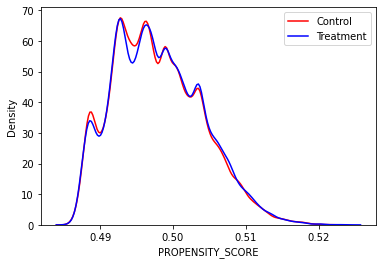

In [14]:
fig = sns.kdeplot(df.query("target==0")["PROPENSITY_SCORE"],bw_adjust=.7, shade=False, color="r")
fig = sns.kdeplot(df.query("target==1")["PROPENSITY_SCORE"],bw_adjust=.7, shade=False, color="b")
plt.legend(['Control','Treatment'])
plt.savefig('fig1a.png', format='png', dpi=300)
plt.show()

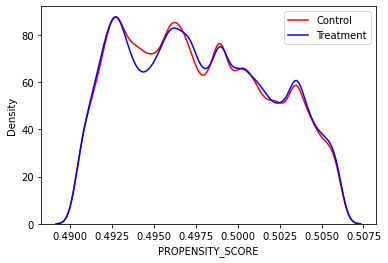

In [15]:
fig = sns.kdeplot(psw_base.query("target==0")["PROPENSITY_SCORE"],bw_adjust=0.7, shade=False, color="r")
fig = sns.kdeplot(psw_base.query("target==1")["PROPENSITY_SCORE"],bw_adjust=0.7, shade=False, color="b")
plt.legend(['Control','Treatment'])
plt.savefig('fig1b.png', format='png', dpi=300)
plt.show()

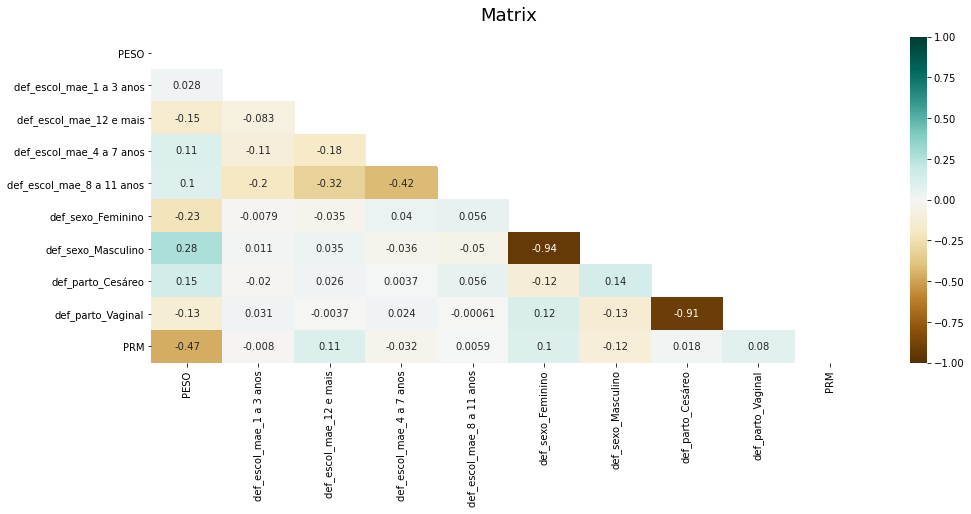

In [18]:
#spearm
var_corr=['PESO',
       #'desc_idade_mae_idade_mae_entre_15_e_25',
       #'desc_idade_mae_idade_mae_entre_25_e_35',
       #'desc_idade_mae_idade_mae_maior_que_35',
       #'desc_idade_mae_idade_mae_menor_que_15',
       'def_escol_mae_1 a 3 anos',
       'def_escol_mae_12 e mais', 'def_escol_mae_4 a 7 anos',
       'def_escol_mae_8 a 11 anos', 'def_sexo_Feminino',
       'def_sexo_Masculino', 'def_parto_Cesáreo',
       'def_parto_Vaginal'
        #,'def_gravidez_Dupla', 'def_gravidez_Ignorado',
        #'def_gravidez_Tripla ou mais', 'def_gravidez_Única'
          ,'PRM']


plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(psw_base[var_corr].corr(method="spearman"), dtype=np.bool))
heatmap = sns.heatmap(psw_base[var_corr].corr(method='spearman'), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Matrix', fontdict={'fontsize':18}, pad=16);